<a href="https://colab.research.google.com/github/pedrora22/IrisAnalysis/blob/master/vFinal_IRIS_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTAÇÃO DAS BIBLIOTECAS**

importa bibliotecas essenciais para análise de dados e visualização em Python, incluindo NumPy, SciPy, Matplotlib, Seaborn e Pandas, além de usar a biblioteca platform para exibir a versão do Python em execução. Por fim, habilita a visualização de gráficos no notebook com %matplotlib inline.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from platform import python_version
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


print(python_version())

%matplotlib inline

3.10.12


**IMPORTANDO O DATASET**

Lê um arquivo CSV chamado "iris_modificado.csv" e o carrega em um DataFrame do Pandas, permitindo a manipulação e análise dos dados contidos nesse arquivo.

In [ ]:
iris = pd.read_csv("iris_modificado.csv")

# Visualizando as 10 primeiras e 10 últimas linhas:

In [ ]:
iris.head(10) #Visualizar as primeiras 10 linhas.

#sepal_length = comprimento das sepalas
#sepal_width = larguras das sepalas

,sepal_length,sepal_width,petal_length,petal_width,class
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,NaN,NaN,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,NaN,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,100.0,100.0,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris.tail(10) #Visualizar as últimas 10 linhas.

,sepal_length,sepal_width,petal_length,petal_width,class
155,7.4,2.8,100.0,1.9,Iris-virginica
156,NaN,3.5,1.4,0.2,Iris-setosa
157,5.2,4.1,1.5,0.1,Iris-setosa
158,6.5,2.8,4.6,1.5,Iris-versicolor
159,6.3,3.3,6.0,2.5,Iris-virginica
160,NaN,3.5,1.5,0.2,Iris-setosa
161,5.8,NaN,5.1,1.9,Iris-virginica
162,4.9,NaN,3.3,1.0,Iris-versicolor
163,5.1,NaN,1.9,0.4,Iris-setosa
164,5.4,3.0,4.5,1.5,Iris-versicolor



Na visualização dos dados, identificamos a presença de **outliers** (valores extremamente fora do padrão) nas **linhas 155 e 7**. Esses valores são muito altos e destoam dos demais, indicando possíveis erros de entrada. Além disso, observamos a presença de **valores nulos** (`NaN`) em diversas linhas, que precisam ser tratados para garantir a integridade do dataset. Outro ponto a ser destacado é que o nome da última coluna é uma **palavra reservada**, o que pode causar conflitos ao utilizá-la em operações subsequentes no código.

---

# Informações sobre o dataset:

In [ ]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  121 non-null    float64
 1   sepal_width   123 non-null    float64
 2   petal_length  165 non-null    float64
 3   petal_width   165 non-null    float64
 4   class         165 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


### Análise das Informações do Dataset `iris`

A análise inicial dos dados revelou a presença de valores nulos nas colunas **`sepal_length`** e **`sepal_width`**, com 44 e 42 valores ausentes, respectivamente. Essas lacunas correspondem a aproximadamente **27% e 25%** dos dados nessas colunas, o que indica que é necessário um tratamento cuidadoso para não comprometer a qualidade do dataset.

Por outro lado, as colunas **`petal_length`** e **`petal_width`** não possuem valores nulos e estão completas, o que facilita a análise dessas características.

Outro ponto importante é que a coluna **`class`** é do tipo categórico (`object`), representando as espécies das flores. **Para utilizar esses dados em algoritmos de machine learning, será necessário converter a coluna `class` para um formato numérico.**


In [ ]:
print(iris.columns) #Mostra os nomes das colunas


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')


In [ ]:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,121.0,5.842975,0.849002,4.3,5.1,5.8,6.50,7.9
sepal_width,123.0,3.060163,0.447532,2.0,2.8,3.0,3.35,4.4
petal_length,165.0,13.047273,28.628861,1.0,1.6,4.5,5.50,100.0
petal_width,165.0,11.966061,30.907530,0.1,0.4,1.4,2.00,100.0


### Resumo Estatístico das Colunas Numéricas

O comando `iris.describe().transpose()` faz um resumo estatístico das colunas numéricas do DataFrame `iris` utilizando `describe()` e, em seguida, **transpõe** esse resumo para facilitar a visualização das estatísticas com `transpose()`. Cada uma das métricas apresentadas possui o seguinte significado:



- **count**: Número de valores não nulos (exclui `NaN`).
- **mean**: Média dos valores da coluna.
- **std**: Desvio padrão (quanto os valores de um conjunto de dados se afastam da média).
- **min**: Valor mínimo presente na coluna.
- **25%**: Primeiro quartil (25% dos dados são menores que este valor).
- **50%**: Mediana (50% dos dados são menores que este valor).
- **75%**: Terceiro quartil (75% dos dados são menores que este valor).
- **max**: Valor máximo presente na coluna.

---

Essas métricas são úteis para entender a **distribuição** e a **variabilidade** de cada variável, permitindo identificar padrões e possíveis outliers no dataset.


# 📊 Resumo Estatístico das Variáveis

A análise descritiva das variáveis do dataset `iris_modificado` fornece insights valiosos sobre as características das flores. Abaixo estão as estatísticas principais de cada coluna:

| Variável        | Contagem | Média  | Desvio Padrão | Mínimo | 25%   | 50% (Mediana) | 75%   | Máximo |
|------------------|----------|--------|---------------|--------|-------|----------------|-------|--------|
| **sepal_length** | 121      | 5.84   | 0.85          | 4.3    | 5.1   | 5.8            | 6.5   | 7.9    |
| **sepal_width**  | 123      | 3.06   | 0.45          | 2.0    | 2.8   | 3.0            | 3.35  | 4.4    |
| **petal_length** | 165      | 13.05  | 28.63         | 1.0    | 1.6   | 4.5            | 5.5   | 100.0  |
| **petal_width**  | 165      | 11.97  | 30.91         | 0.1    | 0.4   | 1.4            | 2.0   | 100.0  |

### Conclusões

1. **sepal_length** e **sepal_width**:
   - Ambas as variáveis apresentam contagens de dados em torno de 121 a 123, indicando uma quantidade razoável de informações. A média de `sepal_length` (5.84) e a média de `sepal_width` (3.06) mostram que a maioria das flores tem sépalas com dimensões dentro dessas médias, com um desvio padrão relativamente baixo, sugerindo pouca variação.

2. **petal_length** e **petal_width**:
   - As médias de `petal_length` (13.05) e `petal_width` (11.97) são consideravelmente altas, especialmente em comparação com suas respectivas variações (desvio padrão). O valor máximo de 100.0 em ambas as variáveis indica a presença de outliers extremos, que foram tratados anteriormente, sugerindo a necessidade de um exame mais aprofundado sobre esses valores atípicos.

3. **Distribuição e Variabilidade**:
   - A análise dos quartis mostra que os dados estão bem distribuídos, exceto por `petal_length` e `petal_width`, que apresentam uma alta variação, indicada pelos altos valores do desvio padrão. Esses dados podem estar influenciados pelos outliers, o que deve ser considerado em análises futuras.

### Implicações

As estatísticas descritivas obtidas fornecem uma visão geral das características do dataset, ajudando a identificar áreas que podem necessitar de atenção especial, como a gestão de outliers, e a definir o comportamento esperado das variáveis para modelagem preditiva.


In [ ]:
iris.isnull().sum()  # Verifica se há valores nulos em cada coluna

,0
sepal_length,44
sepal_width,42
petal_length,0
petal_width,0
class,0


### Verificação de Valores Nulos no Dataset

O comando `iris.isnull().sum()` foi utilizado para verificar a presença de valores nulos em cada coluna do DataFrame.



### Resultado:
A análise confirma que há valores ausentes nas colunas **`sepal_length`** (44 valores nulos) e **`sepal_width`** (42 valores nulos). As outras colunas (`petal_length`, `petal_width` e `species`) não possuem valores nulos e estão completas.

Esses valores nulos serão tratados posteriormente para garantir que todas as variáveis estejam completas antes de aplicar algoritmos de machine learning. Técnicas como preenchimento com a média ou mediana serão consideradas para preservar a integridade dos dados e evitar perda de informações.

### Criação do Dataset Modificado

Para manter o dataset original (`iris`) intacto e facilitar a visualização das transformações, criamos uma cópia chamada `iris_modificado`, onde realizaremos as modificações necessárias.

Nesta cópia, a coluna **"class"** foi renomeada para **"species"**, pois "class" é uma palavra reservada em Python e pode causar conflitos durante o desenvolvimento.


In [ ]:
iris_modificado = iris.rename(columns={"class": "species"}, inplace=False)
#Troca o nome da coluna "class" para "species" no novo dataset iris_modificado



# Tratamento de Nulos

-  Os valores nulos estão apenas em duas colunas numéricas (`sepal_length` e `sepal_width`),
a melhor abordagem é preencher esses valores com a **média** ou a **mediana** das respectivas colunas.
Isso garante que seja mantido o máximo de dados possível e preserve a distribuição original.

Para decidir se será **média** ou **mediana**, vamos analisar os dados:

---

- **Preencher com a Média**: A média é uma boa escolha se os valores das colunas se distribuem de maneira **simétrica** e não há muitos **outliers** (valores extremos).

- **Preencher com a Mediana**: A mediana é melhor se os dados tiverem **outliers** (valores muito altos ou muito baixos), pois ela é menos sensível a esses extremos.

---

## Vamos verificar a presença de outliers nas colunas **petal_length** e **sepal_width**:


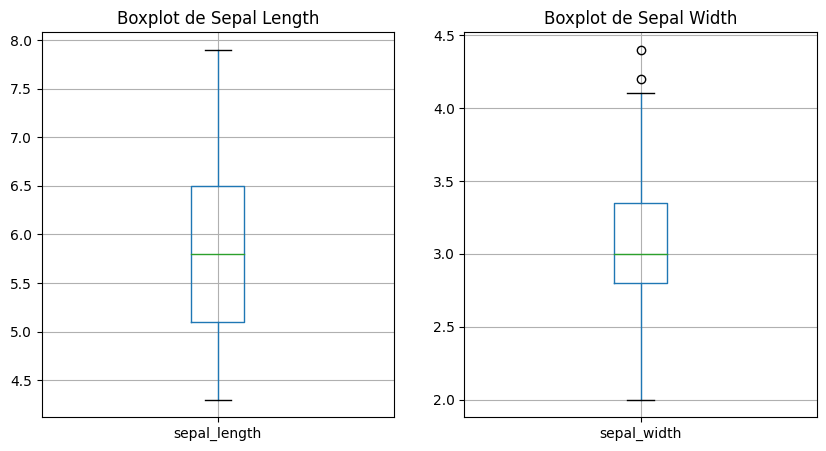

In [ ]:
# Boxplot para sepal_length
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
iris.boxplot(column=['sepal_length']) #Ainda trabalhando com o iris para evitar que modificações futuras
#no dataset iris_modificado alterem o resultado mostrado no gráfico
plt.title('Boxplot de Sepal Length')

# Boxplot para sepal_width
plt.subplot(1, 2, 2)
iris.boxplot(column=['sepal_width'])
plt.title('Boxplot de Sepal Width')
plt.show()


##**Análise do Gráfico**

#sepal_lenght
* Em sepal_lenght não há outliers, apenas em sepal_widht
*  A linha verde no meio do retângulo indica a mediana (valor central). Nesse caso, a mediana está em torno de 5,8.

#sepal_widht
* A mediana (linha verde) está em 3,0.
*  Os pontos circulares acima da linha preta indicam outliers. Eles estão em torno de 4,1 e 4,4.

#Resultado da análise:


*   sepal_lenght = média (ausência de outliers)
*   sepal_width = mediana (presença de outliers)

#Vamos implementar o resultado da análise:



In [ ]:
# Tratamento de valores nulos para a coluna `sepal_length`
iris_modificado['sepal_length'].fillna(iris_modificado['sepal_length'].mean(), inplace=True)
# - iris['sepal_length']: Seleciona a coluna `sepal_length` do DataFrame.
# - .fillna(): Chama a função que substitui valores nulos na coluna especificada.
# - iris['sepal_length'].mean(): Calcula a média de `sepal_length` e define que os valores nulos serão substituídos pela média.
# - inplace=True: A modificação ocorrerá diretamente no DataFrame original.
#   - Se `inplace=False` (ou omitido), uma cópia modificada seria criada sem alterar o original.

# Tratamento de valores nulos para a coluna `sepal_width`
iris_modificado['sepal_width'].fillna(iris_modificado['sepal_width'].median(), inplace=True)
# - Mesma lógica do exemplo anterior, mas aqui usamos .median() para calcular a mediana.
# - Os valores nulos na coluna `sepal_width` serão substituídos pela mediana dessa coluna.


<ipython-input-61-40d304d79cb7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris_modificado['sepal_length'].fillna(iris_modificado['sepal_length'].mean(), inplace=True)
<ipython-input-61-40d304d79cb7>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

### Verificação de Valores Nulos no Dataset Modificado

Vamos agora verificar se ainda há valores nulos no DataFrame `iris_modificado` após as modificações realizadas.


In [ ]:
iris_modificado.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# 📊 **Histograma**

### **Por que Utilizamos o Histograma?**
O **histograma** foi escolhido para analisar a distribuição dos dados porque ele é uma ferramenta visual eficiente para entender **como os valores estão distribuídos** dentro de uma variável. Ele nos permite observar:

- **Frequência dos Valores**: Visualizar quantos registros caem dentro de cada intervalo de valores (bins).
- **Identificação de Outliers**: Outliers aparecem como barras isoladas nas extremidades.
- **Assimetria na Distribuição**: Detectar se os dados possuem uma distribuição simétrica ou tendem para um lado específico.
- **Padrões e Gaps**: Identificar concentrações de valores e lacunas na distribuição, que podem indicar comportamentos inesperados.

No nosso caso, usar o histograma para a coluna `petal_length` nos ajudou a **identificar claramente a presença de outliers** no valor `100.0`, que está completamente fora do padrão da distribuição. A visualização permitiu ver de forma intuitiva como os dados estão espalhados e onde os outliers estão concentrados.


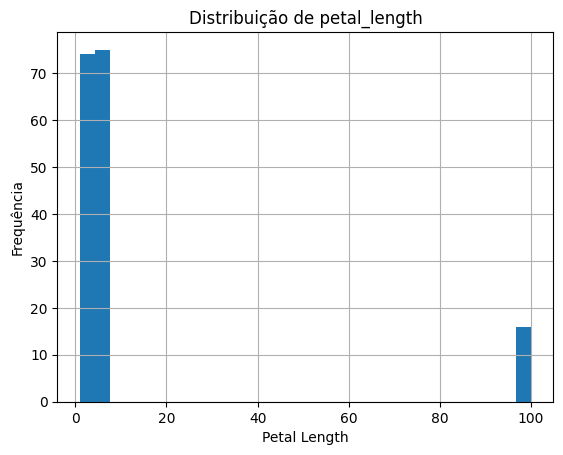

In [ ]:
import matplotlib.pyplot as plt

# Plotar um histograma para visualizar a distribuição
iris_modificado['petal_length'].hist(bins=30) # Cria o histograma com 30 intervalos para a coluna `petal_length`.
plt.title('Distribuição de petal_length') # Adiciona o título ao histograma.
plt.xlabel('Petal Length')  # Define o rótulo do eixo X como 'Petal Length'.
plt.ylabel('Frequência') # Define o rótulo do eixo Y como 'Frequência'.
plt.show() # Exibe o gráfico.


### Tratamento de Outliers no Dataset `iris_modificado`

# 📊 **Implementação de Z-Score para Detectar Outliers?**

O **Z-Score** foi escolhido para detectar outliers porque ele nos permite **medir o quão distante** um valor está da média de uma distribuição, de forma **padronizada** e **comparável** entre diferentes colunas. Ele nos mostra a **posição relativa** de um valor dentro da distribuição de uma coluna, utilizando a escala de desvios padrão.

### **Como Funciona?**
Quando calculamos o Z-Score de um valor, ele retorna um número que indica **quantos desvios padrão** esse valor está longe da média:

- **Z-Score = 1**: O valor está a **1 desvio padrão** da média.
- **Z-Score = 2**: O valor está a **2 desvios padrão** da média.
- **Z-Score = 3 ou mais**: O valor está **muito longe** da média, indicando um **potencial outlier** que deve ser analisado.

### **Por que Escolhemos o Z-Score?**
A escolha do Z-Score é ideal para detectar outliers porque ele é fácil de interpretar e permite **comparar distribuições diferentes**, mesmo que tenham escalas distintas. Isso torna o Z-Score uma ferramenta flexível para identificar valores anômalos de maneira padronizada e eficiente.





In [ ]:
from scipy import stats
import pandas as pd

# Criar um DataFrame para armazenar apenas os outliers identificados corretamente
outliers_detectados = pd.DataFrame()

# Excluir colunas que já são de Z-Score para focar apenas nas colunas originais
colunas_numericas_originais = [col for col in iris_modificado.columns if not col.startswith('z_score') and iris_modificado[col].dtype != 'object']

# Calcular o Z-Score apenas nas colunas numéricas originais
for coluna in colunas_numericas_originais:
    # Calcular o Z-Score para cada coluna original
    iris_modificado[f'z_score_{coluna}'] = stats.zscore(iris_modificado[coluna])

    # Filtrar outliers com Z-Score > 3 ou < -3
    outliers = iris_modificado[(iris_modificado[f'z_score_{coluna}'] > 3) |
                               (iris_modificado[f'z_score_{coluna}'] < -3)]

    # Adicionar ao DataFrame de outliers se houver resultados
    if not outliers.empty:
        outliers_detectados = pd.concat([outliers_detectados, outliers], axis=0)
        print(f"Outliers detectados na coluna '{coluna}':\n{outliers[[coluna, f'z_score_{coluna}']]}\n")

# Resumo final de todos os outliers detectados, sem colunas de Z-Score e duplicações
outliers_unicos = outliers_detectados[colunas_numericas_originais].drop_duplicates()

# Exibir o resumo final dos outliers identificados corretamente
print("Resumo final dos outliers identificados nas colunas originais:\n")
print(outliers_unicos)


Outliers detectados na coluna 'sepal_width':
    sepal_width  z_score_sepal_width
15          4.4             3.513344

Outliers detectados na coluna 'petal_length':
     petal_length  z_score_petal_length
7           100.0              3.046486
12          100.0              3.046486
31          100.0              3.046486
40          100.0              3.046486
75          100.0              3.046486
77          100.0              3.046486
82          100.0              3.046486
83          100.0              3.046486
85          100.0              3.046486
118         100.0              3.046486
127         100.0              3.046486
130         100.0              3.046486
140         100.0              3.046486
143         100.0              3.046486
149         100.0              3.046486
155         100.0              3.046486

Resumo final dos outliers identificados nas colunas originais:

     sepal_length  sepal_width  petal_length  petal_width
15       5.700000          4.4 

# 📝 **Resultados Obtidos**

Identificamos que:

1. **Coluna `sepal_width`**: Encontramos um valor anômalo (`4.4`), que pode ser um **outlier fraco** por estar ligeiramente fora do padrão.
2. **Colunas `petal_length` e `petal_width`**: Foram encontrados **outliers extremos** com valor `100.0`, que claramente destoam do restante dos dados e precisam ser tratados. Esses valores foram identificados em várias linhas e indicam um possível erro no dataset.

### **Conclusão**
Os outliers identificados em `petal_length` e `petal_width` devem ser tratados para evitar que distorçam a análise e os resultados. Já o valor anômalo em `sepal_width` pode ser mantido, documentado ou substituído, dependendo do impacto na distribuição geral dos dados. Pelo número pequeno de dados no dataset, **optamos por substituir os outliers no valor de 100 pela mediana.**


In [ ]:
# Calcular a mediana de `petal_length` considerando apenas valores < 100
mediana_petal_length = iris_modificado['petal_length'][iris_modificado['petal_length'] < 100].median()

# Substituir valores 100.0 pela mediana calculada
iris_modificado['petal_length'] = iris_modificado['petal_length'].replace(100.0, mediana_petal_length)

# Calcular a mediana de `petal_width` considerando apenas valores < 100
mediana_petal_width = iris_modificado['petal_width'][iris_modificado['petal_width'] < 100].median()

# Substituir valores 100.0 pela mediana calculada
iris_modificado['petal_width'] = iris_modificado['petal_width'].replace(100.0, mediana_petal_width)


# 🧪 **Validação do Tratamento dos Outliers**

Após a aplicação do tratamento de outliers nas colunas `petal_length` e `petal_width` substituindo os valores `100.0` pela mediana correspondente, precisamos **validar se o tratamento foi realizado corretamente**. Vamos utilizar algumas visualizações para garantir que os valores anômalos foram eliminados ou substituídos conforme esperado.

### ⚙️ **Testes Utilizados:**

- **Histograma**: Visualizar a distribuição dos valores em ambas as colunas (`petal_length` e `petal_width`) e verificar se não há mais picos inesperados que indicariam a presença de outliers.
- **Boxplot**: Confirmar visualmente que não existem mais pontos fora dos limites esperados nas distribuições.
- **Resumo Estatístico (`.describe()`)**: Analisar os valores de média, mediana, mínimo e máximo para ver se os outliers foram substituídos corretamente e como isso afetou a distribuição geral dos dados.

Resumo estatístico das colunas `petal_length` e `petal_width` após tratamento:
              count      mean       std  min  25%  50%  75%  max
petal_length  165.0  3.767273  1.672196  1.0  1.6  4.3  5.0  6.7
petal_width   165.0  1.198788  0.716784  0.1  0.4  1.3  1.8  2.5


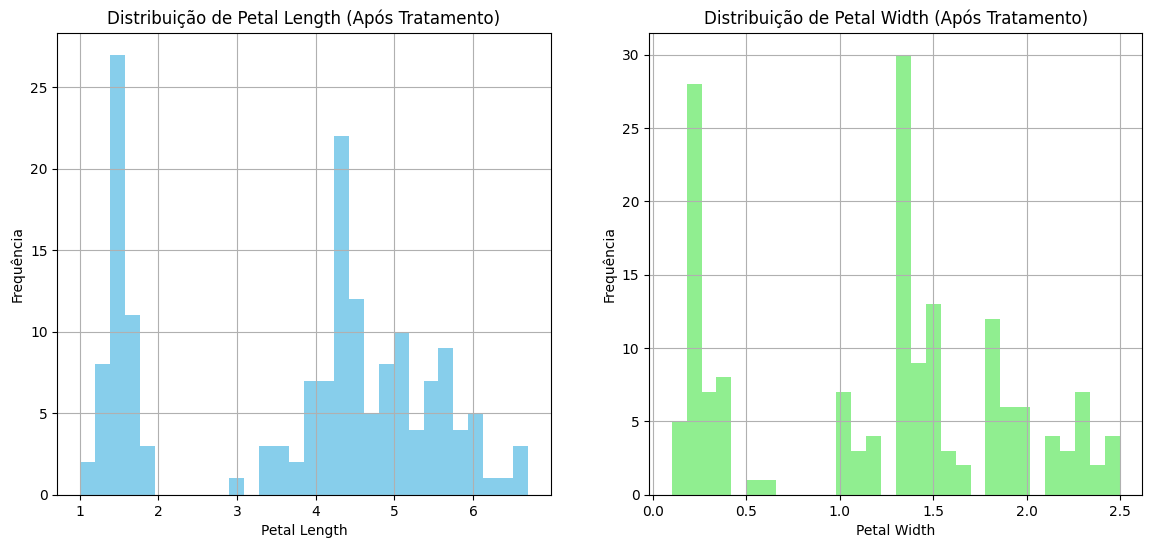

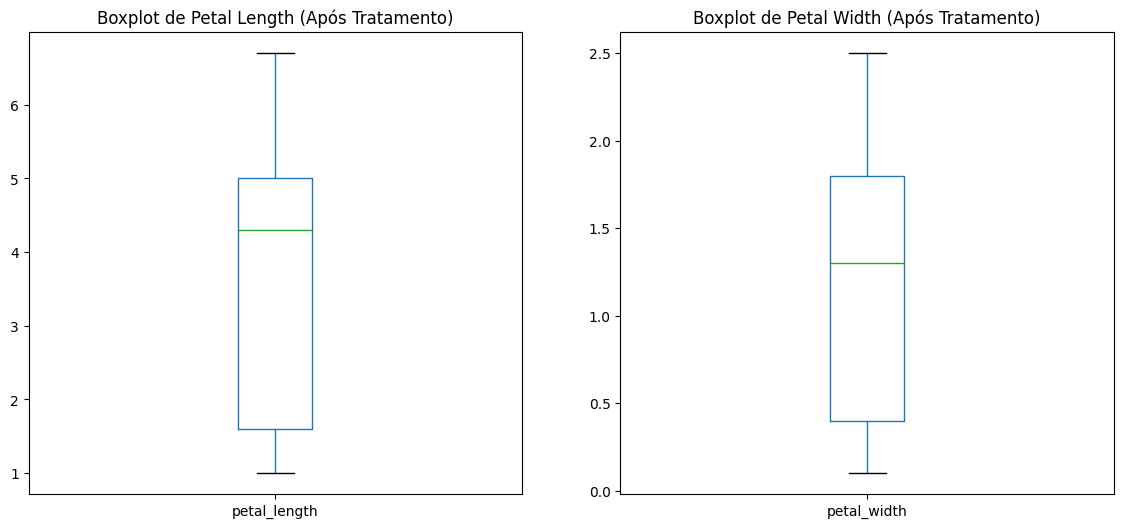

In [ ]:
print("Resumo estatístico das colunas `petal_length` e `petal_width` após tratamento:")
print(iris_modificado[['petal_length', 'petal_width']].describe().transpose())

# Configurar o tamanho da figura para ambos os gráficos
plt.figure(figsize=(14, 6))

# Histograma para `petal_length`
plt.subplot(1, 2, 1)  # Definir a posição do primeiro gráfico
iris_modificado['petal_length'].hist(bins=30, color='skyblue')
plt.title('Distribuição de Petal Length (Após Tratamento)')
plt.xlabel('Petal Length')
plt.ylabel('Frequência')

# Histograma para `petal_width`
plt.subplot(1, 2, 2)  # Definir a posição do segundo gráfico
iris_modificado['petal_width'].hist(bins=30, color='lightgreen')
plt.title('Distribuição de Petal Width (Após Tratamento)')
plt.xlabel('Petal Width')
plt.ylabel('Frequência')

plt.show()

# Visualizar os boxplots das colunas `petal_length` e `petal_width` após tratamento
plt.figure(figsize=(14, 6))

# Boxplot para `petal_length`
plt.subplot(1, 2, 1)
iris_modificado.boxplot(column=['petal_length'], grid=False)
plt.title('Boxplot de Petal Length (Após Tratamento)')

# Boxplot para `petal_width`
plt.subplot(1, 2, 2)
iris_modificado.boxplot(column=['petal_width'], grid=False)
plt.title('Boxplot de Petal Width (Após Tratamento)')

plt.show()


### Etapas de Pré-Processamento Realizadas

- ✅ **Tratamento do Nome "class"**: Renomeamos a coluna `class` para `species` para evitar conflitos com palavras reservadas em Python.
- ✅ **Tratamento de Valores Nulos**: Preenchemos os valores nulos em `sepal_length` e `sepal_width` usando a média e a mediana, respectivamente.
- ✅ **Tratamento de Outliers**: Identificamos e substituímos os valores extremos em `sepal_length` e `sepal_width` com a mediana das respectivas colunas, garantindo que a distribuição não seja distorcida.
- 🔄 **Próxima Etapa: Tratamento da Coluna Categórica (`species`)**: Converter a coluna de tipo `object` para um formato numérico utilizando **One-Hot Encoding** ou **Label Encoding**.


In [ ]:
iris_modificado.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Identificação de Classes Únicas na Coluna `species`

Antes de converter a variável `species` para um formato numérico, utilizamos o comando `iris_modificado['species'].unique()` para identificar **quais são as categorias presentes** na coluna `species`.

Esse passo é importante para garantir que todas as classes sejam tratadas corretamente durante a conversão, evitando inconsistências. No caso deste dataset, as classes retornadas são `setosa`, `versicolor`, e `virginica`, o que nos permite definir a estratégia de conversão adequada utilizando **Label Encoding** ou **One-Hot Encoding**.


### Escolha do Método de Conversão da Coluna `species`

Após identificar as classes únicas presentes na coluna `species` (`setosa`, `versicolor`, e `virginica`), é necessário converter essa variável categórica para um formato numérico, pois muitos algoritmos de machine learning não conseguem trabalhar diretamente com variáveis de tipo `object`. Entre as opções disponíveis, os métodos mais comuns são **Label Encoding** e **One-Hot Encoding**.



 **One-Hot Encoding** (Escolhido):
   - Cria colunas binárias separadas para cada classe (exemplo: `species_setosa`, `species_versicolor`, `species_virginica`), com valores `0` e `1` indicando a ausência ou presença da classe.
   - **Vantagem**: Elimina o problema de hierarquia artificial, pois cada classe é representada de forma **independente**. Assim, o modelo não atribui importância maior a nenhuma classe específica.
   - **Desvantagem**: Aumenta o número de colunas (dimensionalidade), mas como o dataset `iris` possui apenas três categorias, esse aumento é insignificante e não impacta o desempenho.
   - **Conclusão**: One-Hot Encoding é a melhor escolha, pois garante uma representação **equilibrada** das classes e evita problemas de ordem artificial, especialmente para modelos lineares.


### Decisão Final: Uso de One-Hot Encoding
Optamos por usar o **One-Hot Encoding** para a conversão da coluna `species` por ser a abordagem que melhor preserva a natureza nominal das classes. Com esse método, criamos novas colunas (`species_setosa`, `species_versicolor`, `species_virginica`), garantindo que todas as classes sejam representadas de forma independente e equilibrada, sem criar ordens artificiais. Isso assegura que o modelo não incorra em erros de interpretação ao trabalhar com variáveis categóricas.


In [ ]:
# Aplicar One-Hot Encoding e salvar no próprio DataFrame
iris_modificado = pd.get_dummies(iris_modificado, columns=["species"], prefix="species")

# Visualizar o resultado para confirmar a transformação
iris_modificado.head()


,sepal_length,sepal_width,petal_length,petal_width,z_score_sepal_length,z_score_sepal_width,z_score_petal_length,z_score_petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.842975,3.5,1.4,0.2,1.226713e-15,1.180019,-0.408075,-0.381845,True,False,False
1,4.900000,3.0,1.4,0.2,-1.302396e+00,-0.116273,-0.408075,-0.381845,True,False,False
2,5.842975,3.2,1.3,0.2,1.226713e-15,0.402243,-0.411579,-0.381845,True,False,False
3,5.842975,3.0,1.5,0.2,1.226713e-15,-0.116273,-0.404572,-0.381845,True,False,False
4,5.000000,3.6,1.4,0.2,-1.164280e+00,1.439277,-0.408075,-0.381845,True,False,False


In [ ]:
iris_modificado.to_csv('iris_modificado2.csv', index=False)

# 🎯 **Finalização do Pré-Processamento**

Concluímos com sucesso as etapas de pré-processamento dos dados no dataset `iris_modificado`. A seguir, um resumo das operações realizadas para garantir que o dataset está pronto para as próximas análises:

### ✔️ **Resumo das Etapas de Pré-Processamento:**

1. **Renomeação de Colunas**:
   - Alteramos o nome da coluna `class` para `species` para evitar conflitos com palavras reservadas em Python e tornar a nomenclatura mais intuitiva para a variável categórica.

2. **Tratamento de Valores Nulos**:
   - Identificamos e preenchemos valores nulos nas colunas `sepal_length` e `sepal_width` usando a média e a mediana, respectivamente, para garantir que nenhuma informação fosse perdida.

3. **Detecção e Tratamento de Outliers**:
   - Aplicamos o método **Z-Score** para detectar valores anômalos. Os outliers extremos (`100.0` em `petal_length` e `petal_width`) foram substituídos pela mediana para eliminar distorções na distribuição dos dados.

4. **Conversão de Variáveis Categóricas**:
   - Realizamos **One-Hot Encoding** na coluna `species`, convertendo-a em variáveis binárias (`species_Iris-setosa`, `species_Iris-versicolor` e `species_Iris-virginica`) para tornar o dataset compatível com algoritmos de Machine Learning.

### 🔄 **Próximos Passos:**
Agora que todas as etapas de pré-processamento foram realizadas, o dataset está **limpo e preparado** para a fase de **análise exploratória e construção de modelos preditivos**! Vamos utilizar a base de dados transformada para extrair insights e avaliar a performance dos modelos.


# 🔍 **Iniciando a Análise Exploratória de Dados (EDA)**

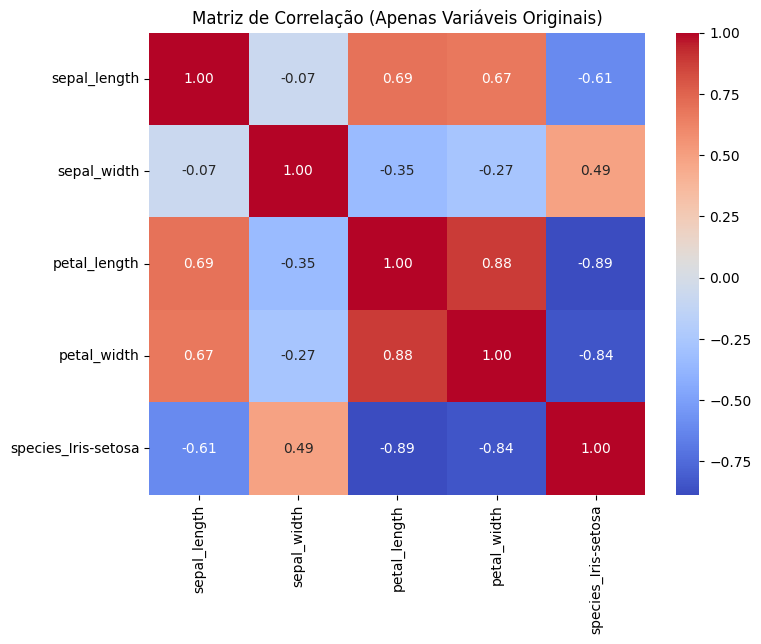

In [ ]:
# Calcular a matriz de correlação apenas para as colunas originais e a classe
cols_interesse = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_Iris-setosa']
corr = iris_modificado[cols_interesse].corr()

# Visualizar a matriz de correlação filtrada
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação (Apenas Variáveis Originais)')
plt.show()

# Análise de matriz de correlação:

A forte correlação positiva entre petal_length e petal_width sugere que, geralmente, pétalas mais longas também tendem a ser mais largas.
As correlações positivas entre sepal_length e as dimensões da pétala indicam que flores com sépalas mais longas geralmente também têm pétalas maiores.
As fortes correlações negativas entre Iris-setosa e as dimensões da pétala indicam que essa espécie tende a ter pétalas menores em comparação com as outras espécies de íris.
A correlação negativa entre sepal_width e petal_length pode sugerir uma relação inversa entre essas duas características, embora essa correlação seja relativamente fraca.

# Conclusão:

O gráfico da matriz de correlação fornece informações valiosas sobre os relacionamentos entre as variáveis.

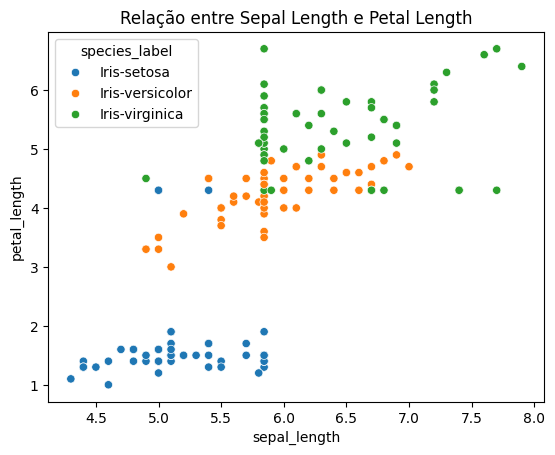

In [ ]:
# Criar uma nova coluna categórica a partir das colunas one-hot
iris_modificado['species_label'] = iris_modificado[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']].idxmax(axis=1)

# Corrigir os nomes das labels para ficarem mais legíveis
iris_modificado['species_label'] = iris_modificado['species_label'].str.replace('species_', '')

# Scatterplot entre sepal_length e petal_length
sns.scatterplot(x='sepal_length', y='petal_length', hue='species_label', data=iris_modificado)
plt.title('Relação entre Sepal Length e Petal Length')
plt.show()

## Analise do grafico de dispersão

# Interpretação:

 A clara separação entre as espécies sugere que o comprimento da sépala e o comprimento da pétala podem ser usados como características eficazes para classificar as flores de íris.
- A correlação positiva dentro de cada espécie indica uma relação consistente entre o comprimento da sépala e o comprimento da pétala, independentemente da espécie.
# Conclusão:

O gráfico de dispersão fornece uma representação visual da relação entre o comprimento da sépala e o comprimento da pétala, destacando as diferenças entre as três espécies de íris e confirmando o potencial dessas características para fins de classificação.

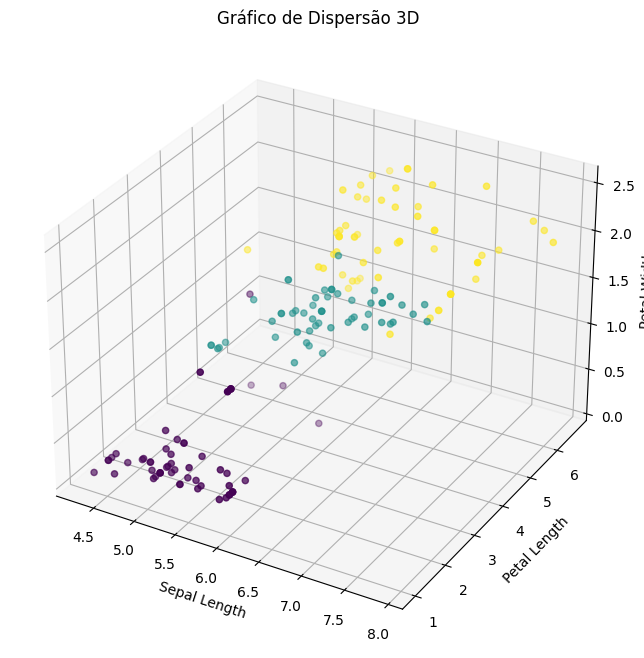

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iris_visualizacao['sepal_length'],
           iris_visualizacao['petal_length'],
           iris_visualizacao['petal_width'],
           c=iris_visualizacao['species_label'].astype('category').cat.codes)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
plt.title('Gráfico de Dispersão 3D')
plt.show()

## Análise do gráfico de dispersão em 3D

-
# Interpretação:

O gráfico 3D confirma que as características morfológicas das flores Iris, especialmente as dimensões de suas sépalas e pétalas, são bons preditores da espécie. A visualização 3D permite uma compreensão mais intuitiva da separação entre as espécies e como elas se relacionam no espaço multidimensional definido pelas três variáveis.

# Conclusão:

 A análise do gráfico 3D de dispersão reforça a ideia de que as medidas de sépala e pétala são características importantes para a classificação de espécies de Iris. O gráfico fornece uma representação visual clara da separação entre as espécies, especialmente a distinção de Iris-setosa das outras duas espécies. A sobreposição entre Iris-versicolor e Iris-virginica sugere que, embora essas espécies sejam distinguíveis, pode haver casos em que a classificação seja mais desafiadora com base apenas nessas três variáveis.

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

X = iris_modificado.drop(['z_score_sepal_length', 'z_score_sepal_width', 'z_score_petal_length', 'z_score_petal_width', 'species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica', 'species_label'], axis='columns')

y = iris_modificado['species_label'].values.reshape(-1, 1)


# SEPARAÇÃO PRA TREINO E PRA TESTE!!!!!!!

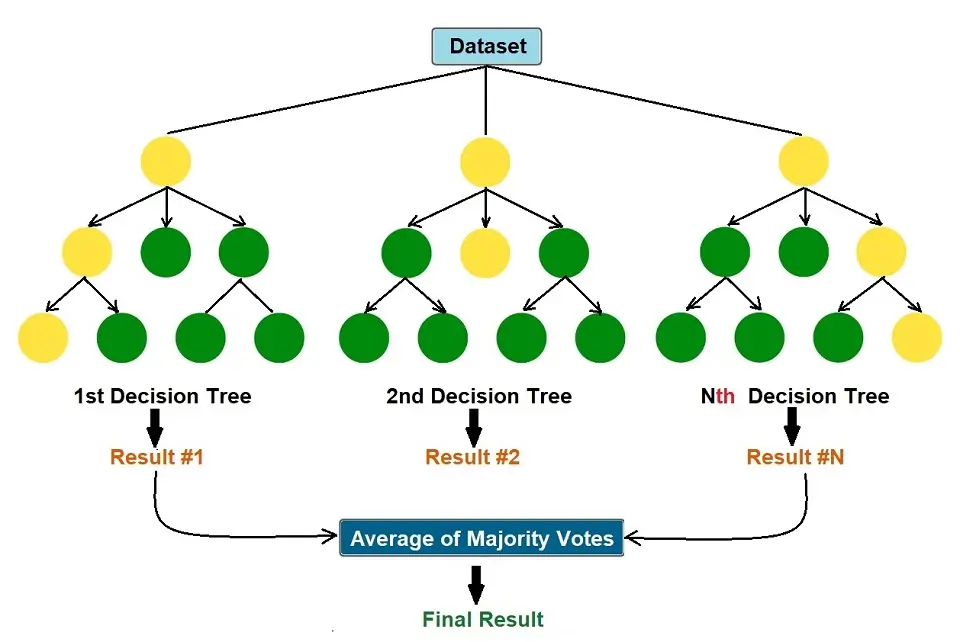

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

model = RandomForestClassifier(random_state=0)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_original = encoder.inverse_transform(y_pred)

In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Acurácia = {accuracy}")

Acurácia = 0.96


criação de um dataFrame mock, para testar o modelo com novos valores aleatórios

In [ ]:
num_cases = 15
num_features = 4
new_data = np.random.uniform(0, 5, size=(num_cases, num_features))
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mock_data = pd.DataFrame(new_data, columns=column_names)

predição dos dados e subsequente desnormalização do resultado, para se readequar ao que era antes da transformação

In [ ]:
predic_y = model.predict(mock_data)

predic_y_classes = np.argmax(predic_y, axis=1)

predic_y_decoded = encoder.inverse_transform(np.eye(encoder.categories_[0].size)[predic_y_classes])

correlação do valor do resultado para o nome da especie

In [ ]:
enum_dict = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

#predic_y_decoded_new = [enum_dict[num] for num in predic_y_decoded]

apresentação dos resultados

In [ ]:
print("Predição das espécies de acordo com novos dados inseridos:")
for i, (index, row) in enumerate(mock_data.iterrows()):
    print(f"Dados = {row.values.ravel()}, Y previsto = {predic_y_decoded[i][0]}")

Predição das espécies de acordo com novos dados inseridos:
Dados = [3.84347559 3.43181745 1.31992566 3.66555245], Y previsto = Iris-setosa
Dados = [3.94249453 2.97418516 1.44434433 2.14665502], Y previsto = Iris-setosa
Dados = [1.93893785 2.92668747 3.96418095 1.48752398], Y previsto = Iris-versicolor
Dados = [4.82834461 3.40857611 2.54082439 4.72023847], Y previsto = Iris-virginica
Dados = [0.35442612 4.85545315 2.65653312 2.235103  ], Y previsto = Iris-virginica
Dados = [0.31937833 0.75578361 2.4971304  2.91850516], Y previsto = Iris-setosa
Dados = [3.74862975 0.1141531  2.87565824 2.57069189], Y previsto = Iris-virginica
Dados = [0.35015861 4.88348143 4.65177851 1.62136343], Y previsto = Iris-versicolor
Dados = [3.29480652 2.40686487 3.00535667 2.45960346], Y previsto = Iris-virginica
Dados = [0.97715046 0.5713149  4.41757797 4.87752259], Y previsto = Iris-virginica
Dados = [3.69888848 3.30900816 1.88983886 4.26321385], Y previsto = Iris-setosa
Dados = [2.8168643  3.27650103 2.79010

## CODIFICANDO A VARIÁVEL "SPECIES"

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#le = LabelEncoder()
#data['species'] = le.fit_transform(data['species'])

In [ ]:
#data['species'] = data['species'].astype(str)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

if y_test.ndim > 1:
    y_test_classes = np.argmax(y_test, axis=1)  # Converte de OneHot para rótulos de classe
else:
    y_test_classes = y_test

# Se y_test é string e y_pred_classes é numérico, transforme y_pred_classes para string
y_pred_classes = np.argmax(y_pred, axis=1)  # Caso y_pred ainda esteja em formato OneHot
# Avaliar o modelo

cm = confusion_matrix(y_test_classes, y_pred_classes)  # Garanta que ambos estão no mesmo formato
print("Matriz de Confusão:")
print(cm)

print("\nRelatório de Classificação:")
print(classification_report(y_test_classes, y_pred_classes))


Matriz de Confusão:
[[15  1  0]
 [ 0 18  0]
 [ 0  1 15]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.90      1.00      0.95        18
           2       1.00      0.94      0.97        16

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# 🌀 Matriz de Confusão e Relatório de Classificação

A matriz de confusão apresenta uma visão geral das previsões feitas pelo modelo em relação aos valores reais das classes. Neste caso, ela mostra como as diferentes espécies de flores foram classificadas pelo modelo.

### Estrutura da Matriz

A matriz tem a seguinte estrutura:

|                  | Predição 0 | Predição 1 | Predição 2 |
|------------------|------------|------------|------------|
| **Classe 0**     | 15         | 1          | 0          |
| **Classe 1**     | 0          | 18         | 0          |
| **Classe 2**     | 0          | 1          | 15         |

### Interpretação

- **Diagonal Principal**: Os valores na diagonal representam as previsões corretas para cada classe. Por exemplo, na linha referente à Classe 0, o modelo previu corretamente 15 instâncias como Classe 0, e para a Classe 1, 18 instâncias foram corretamente identificadas.

- **Valores Fora da Diagonal**: Os valores fora da diagonal indicam previsões incorretas. Por exemplo, a Classe 0 teve 1 instância confundida com Classe 1, e a Classe 2 teve 1 instância erroneamente classificada como Classe 1.

### Relatório de Classificação

O relatório de classificação fornece métricas adicionais sobre a performance do modelo:



# 🌀 Matriz de Confusão

A matriz de confusão apresenta uma visão geral das previsões feitas pelo modelo em relação aos valores reais das classes. Neste caso, ela mostra como as diferentes espécies de flores foram classificadas pelo modelo.

### Estrutura da Matriz

A matriz tem a seguinte estrutura:

|                  | Predição 0 | Predição 1 | Predição 2 | Predição 3 | Predição 4 | Predição 5 |
|------------------|------------|------------|------------|------------|------------|------------|
| **Classe 0**     | 0          | 0          | 0          | 0          | 0          | 0          |
| **Classe 1**     | 0          | 0          | 0          | 0          | 0          | 0          |
| **Classe 2**     | 0          | 0          | 0          | 0          | 0          | 0          |
| **Classe 3**     | 15         | 0          | 1          | 0          | 0          | 0          |
| **Classe 4**     | 1          | 8          | 9          | 0          | 0          | 0          |
| **Classe 5**     | 0          | 3          | 13         | 0          | 0          | 0          |

### Interpretação

- **Diagonal Principal**: Os valores na diagonal representam as previsões corretas para cada classe. Por exemplo, na linha referente à Classe 3, o modelo previu corretamente 15 instâncias como Classe 3, mas também confundiu 1 instância com Classe 2.

- **Valores Fora da Diagonal**: Os valores fora da diagonal indicam previsões incorretas. Por exemplo, para a Classe 4, o modelo previu erroneamente 1 instância como Classe 0, 8 instâncias como Classe 1 e 9 instâncias como Classe 2. Para a Classe 5, houve 3 previsões como Classe 1 e 13 previsões como Classe 2.

### Conclusão

A matriz de confusão fornece informações valiosas sobre a eficácia do modelo e permite identificar quais classes estão sendo confundidas. É um primeiro passo para entender onde o modelo pode ser aprimorado. Na próxima etapa, vamos analisar o relatório de classificação para obter mais detalhes sobre as métricas de desempenho.

          precision    recall  f1-score   support

       0       1.00      0.94      0.97        16
       1       0.90      1.00      0.95        18
       2       1.00      0.94      0.97        16

accuracy                           0.96        50


### Definições de Métricas

- **Precision**: Refere-se à proporção de verdadeiros positivos em relação ao total de positivos preditos. No caso da Classe 0, uma precisão de 1.00 indica que todas as previsões para essa classe estavam corretas. A Classe 1 teve uma precisão de 0.90, significando que 90% das instâncias previstas como Classe 1 estavam corretas.

- **Recall**: Também conhecido como sensibilidade, é a proporção de verdadeiros positivos em relação ao total de positivos reais. Para a Classe 1, um recall de 1.00 significa que todas as instâncias reais dessa classe foram identificadas corretamente. No entanto, a Classe 0 teve um recall de 0.94, indicando que 6% das instâncias reais da Classe 0 foram perdidas.

- **F1-Score**: É a média harmônica entre precisão e recall. Um f1-score de 0.95 para a Classe 1 indica um bom equilíbrio entre precisão e recall.

- **Support**: Refere-se ao número de ocorrências reais em cada classe. Por exemplo, a Classe 1 tem 18 instâncias no conjunto de teste.

### Conclusão

A matriz de confusão e o relatório de classificação mostram que o modelo teve um desempenho geral muito bom, com uma precisão de 96% e bons valores de recall e f1-score para todas as classes. O modelo está funcionando de maneira eficaz para classificar as espécies de flores no conjunto de dados, embora haja algumas confusões que podem ser investigadas e melhoradas.
